In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####  Import data

In [2]:
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv",date_parser=True)
comcast.shape

(2224, 11)

In [3]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [5]:
# Creating  Date time column
comcast['Date_time'] = comcast['Date'] + " " + comcast['Time']
comcast['Date_time'] = pd.to_datetime(comcast['Date_time'])

In [6]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Date_time                      datetime64[ns]
dtype: object

In [7]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_time
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08 10:22:56
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05-07 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


#### Number of complaints per month

In [8]:
comcast.groupby(comcast.Date_time.dt.month).agg( {'Ticket #': 'count'})#.reset_index()

,Ticket #
Date_time,
4,545
5,399
6,1280


In [9]:
comcast.groupby(comcast.Date_time.dt.month_name()).agg( {'Ticket #': 'count'})#.reset_index()

,Ticket #
Date_time,
April,545
June,1280
May,399


#### Number of complaints per day

In [10]:
comcast.groupby(comcast.Date_time.dt.weekday).agg( {'Ticket #': 'count'})#.reset_index()

,Ticket #
Date_time,
0,296
1,466
2,460
3,366
4,304
5,194
6,138


In [11]:
comcast.groupby(comcast.Date_time.dt.day_name()).agg( {'Ticket #': 'count'})#.reset_index()

,Ticket #
Date_time,
Friday,304
Monday,296
Saturday,194
Sunday,138
Thursday,366
Tuesday,466
Wednesday,460


#### Frequency of complaint type

Where is complaint type column?

In [12]:
comcast.groupby('Received Via')['Ticket #'].agg(Count= 'count')#.reset_index()

,Count
Received Via,
Customer Care Call,1119
Internet,1105


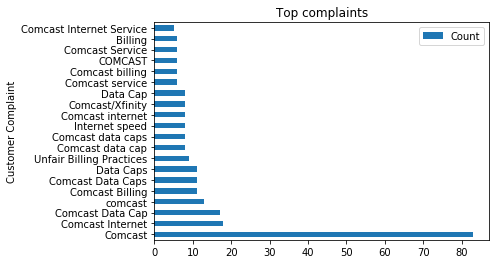

In [13]:
comcast.groupby('Customer Complaint')['Ticket #'].agg(Count= 'count').sort_values(['Count'],ascending = False).head(20).plot.barh()
plt.title("Top complaints")
plt.show()

Internet issue seems most frequent

#### New categorical variable with values open and close

In [14]:
# comcast['Open'] = "Open" if (comcast.Status=="Open" or comcast.Status=="Pending")
comcast['Status_binary'] = np.where((comcast.Status=='Open') | (comcast.Status=='Pending'), 'Open', 'Closed')

In [15]:
comcast.groupby('Status_binary')['Status_binary'].agg(count='count')

,count
Status_binary,
Closed,1707
Open,517


In [16]:
comcast.groupby('Status')['Status'].agg(count='count')

,count
Status,
Closed,734
Open,363
Pending,154
Solved,973


#### Statewise complaint types

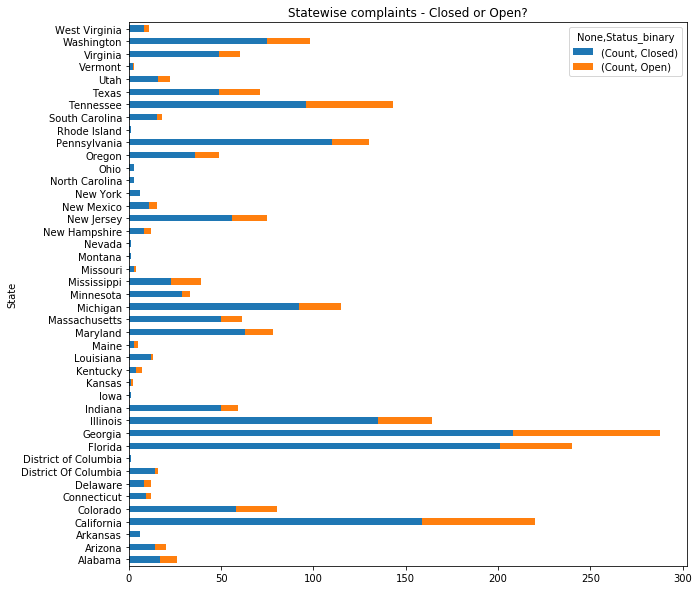

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
comcast.groupby(['State','Status_binary'])['Ticket #'].agg(Count='count').sort_values(['Count']).unstack().plot(kind='barh', stacked=True)
plt.title("Statewise complaints - Closed or Open?")
plt.show()

#### Which state has maximum complaints?
ANS:

#### State having highest % of unresolved/pending complaints?

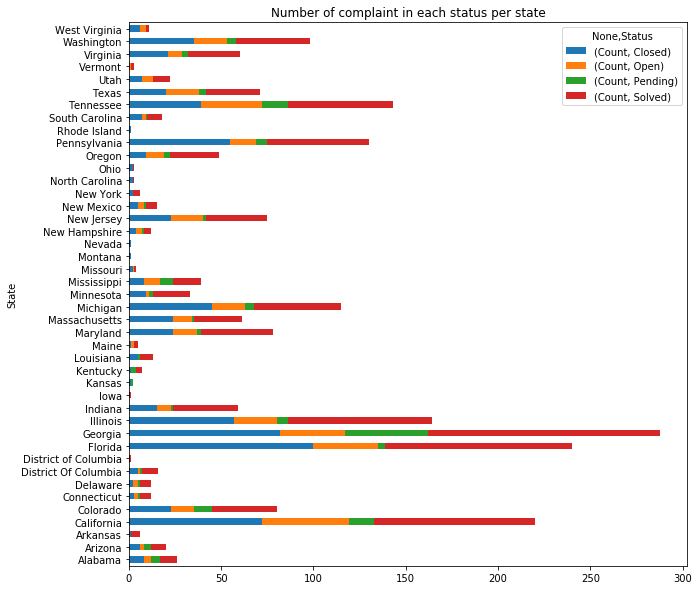

In [18]:
## Number plot
plt.rcParams["figure.figsize"] = (10,10)
comcast.groupby(['State','Status'])['Ticket #'].agg(Count='count').unstack().\
    plot(kind='barh', stacked=True)
plt.title("Number of complaint in each status per state")
plt.show()

In [19]:
## Percentage table
comcast.groupby(['State','Status'])['Ticket #'].agg(Count='count').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).\
    unstack()

Count                                  
Status                    Closed       Open    Pending      Solved
State                                                             
Alabama                30.769231  15.384615  19.230769   34.615385
Arizona                30.000000  10.000000  20.000000   40.000000
Arkansas               16.666667        NaN        NaN   83.333333
California             32.727273  21.363636   6.363636   39.545455
Colorado               28.750000  15.000000  12.500000   43.750000
Connecticut            25.000000  16.666667   8.333333   50.000000
Delaware               16.666667  25.000000   8.333333   50.000000
District Of Columbia   31.250000   6.250000   6.250000   56.250000
District of Columbia         NaN        NaN        NaN  100.000000
Florida                41.666667  14.583333   1.666667   42.083333
Georgia                28.472222  12.152778  15.625000   43.750000
Illinois               34.756098  14.024390   3.658537   47.560976
Indiana                25.423729  13.559322   1.694915   59.322034
Iowa                         NaN        NaN        NaN  100.000000
Kansas                 50.000000        NaN  50.000000         NaN
Kentucky               14.285714        NaN  42.857143   42.857143
Louisiana              38.461538        NaN   7.692308   53.846154
Maine                  20.000000  40.000000        NaN   40.000000
Maryland               30.769231  16.666667   2.564103   50.000000
Massachusetts          39.344262  16.393443   1.639344   42.622951
Michigan               39.130435  15.652174   4.347826   40.869565
Minnesota              27.272727   6.060606   6.060606   60.606061
Mississippi            20.512821  23.076923  17.948718   38.461538
Missouri               50.000000  25.000000        NaN   25.000000
Montana               100.000000        NaN        NaN         NaN
Nevada                100.000000        NaN        NaN         NaN
New Hampshire          33.333333  25.000000   8.333333   33.333333
New Jersey             30.666667  22.666667   2.666667   44.000000
New Mexico             33.333333  20.000000   6.666667   40.000000
New York               33.333333        NaN        NaN   66.666667
North Carolina         66.666667        NaN        NaN   33.333333
Ohio                   66.666667        NaN        NaN   33.333333
Oregon                 18.367347  20.408163   6.122449   55.102041
Pennsylvania           42.307692  10.769231   4.615385   42.307692
Rhode Island          100.000000        NaN        NaN         NaN
South Carolina         38.888889  11.111111   5.555556   44.444444
Tennessee              27.272727  23.076923   9.790210   39.860140
Texas                  28.169014  25.352113   5.633803   40.845070
Utah                   31.818182  27.272727        NaN   40.909091
Vermont                      NaN  33.333333        NaN   66.666667
Virginia               35.000000  13.333333   5.000000   46.666667
Washington             35.714286  18.367347   5.102041   40.816327
West Virginia          54.545455  27.272727        NaN   18.181818

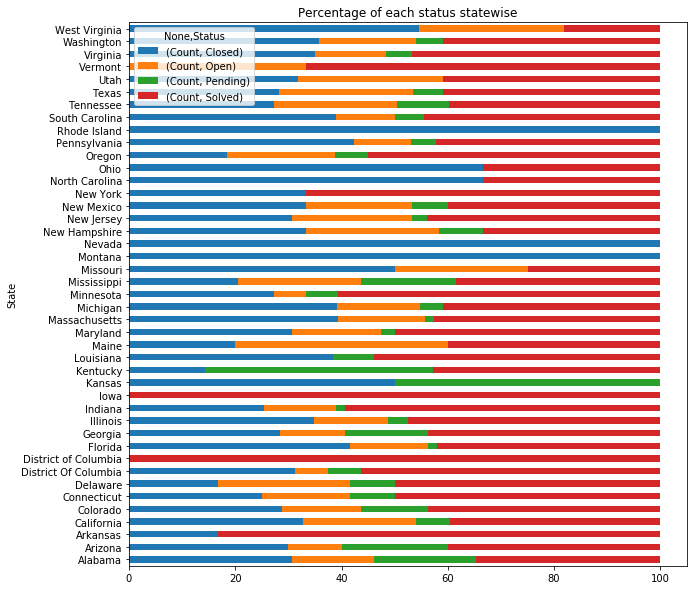

In [20]:
## Percentage plot (above table in plot)
plt.rcParams["figure.figsize"] = (10,10)
comcast.groupby(['State','Status'])['Ticket #'].agg(Count='count').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).\
    unstack().\
    plot(kind='barh', stacked=True)
plt.title("Percentage of each status statewise")
plt.show()

#### Provide the % of complaints resolved till date, which were received through internet and customer care call

NOTE: All complaints received by 2 modes only - internet and customer call


In [21]:
## Percentage of resolved complaints per state table
comcast.groupby(['State','Status'])['Ticket #'].agg(Count='count').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).\
    unstack()["Count"]["Solved"]

State
Alabama                  34.615385
Arizona                  40.000000
Arkansas                 83.333333
California               39.545455
Colorado                 43.750000
Connecticut              50.000000
Delaware                 50.000000
District Of Columbia     56.250000
District of Columbia    100.000000
Florida                  42.083333
Georgia                  43.750000
Illinois                 47.560976
Indiana                  59.322034
Iowa                    100.000000
Kansas                         NaN
Kentucky                 42.857143
Louisiana                53.846154
Maine                    40.000000
Maryland                 50.000000
Massachusetts            42.622951
Michigan                 40.869565
Minnesota                60.606061
Mississippi              38.461538
Missouri                 25.000000
Montana                        NaN
Nevada                         NaN
New Hampshire            33.333333
New Jersey               44.000000
New Mexico    

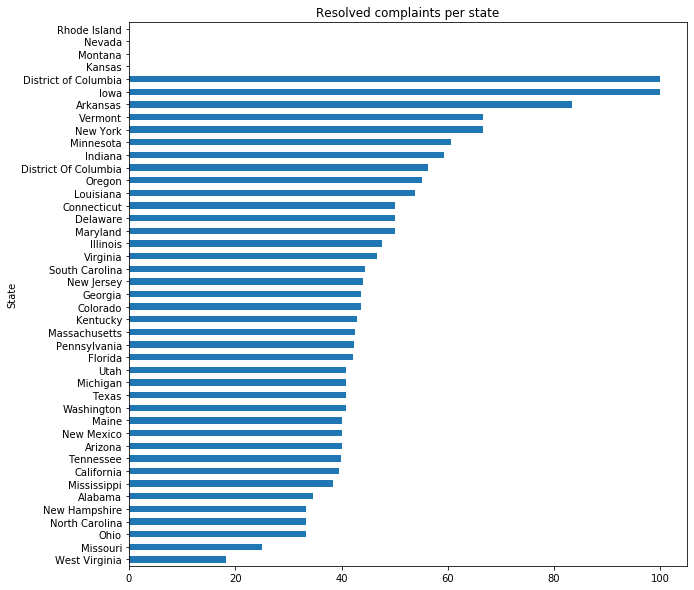

In [22]:
## Percentage of resolved complaints per state table
comcast.groupby(['State','Status'])['Ticket #'].agg(Count='count').groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).\
    unstack()["Count"]["Solved"].sort_values().plot(kind='barh', stacked=True)
plt.title("Resolved complaints per state")
plt.show()